In [2]:
import pandas as pd

# Charger le fichier Excel
delay_analysis = pd.read_excel("data/get_around_delay_analysis.xlsx")

# Afficher les premières lignes du dataset pour vérifier
delay_analysis.head()


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [3]:
# Compter les occurrences de "canceled" dans la colonne "state"
canceled_count = delay_analysis[delay_analysis['state'] == 'canceled'].shape[0]

# Compter les occurrences de "ended" dans la colonne "state"
ended_count = delay_analysis[delay_analysis['state'] == 'ended'].shape[0]

# Afficher les résultats
print(f"Nombre de 'canceled': {canceled_count}")
print(f"Nombre de 'ended': {ended_count}")


Nombre de 'canceled': 3265
Nombre de 'ended': 18045


In [4]:
# Retirer les lignes où 'state' est égal à 'canceled'
delay_analysis_cleaned = delay_analysis[delay_analysis['state'] != 'canceled']

# Calculer la moyenne sur la colonne 'delay_at_checkout_in_minutes' pour les lignes restantes
average_delay = delay_analysis_cleaned['delay_at_checkout_in_minutes'].mean()

# Afficher la moyenne
print(f"Temps moyen de retard à la remise du véhicule (en minutes) : {average_delay}")


Temps moyen de retard à la remise du véhicule (en minutes) : 60.77387580299786


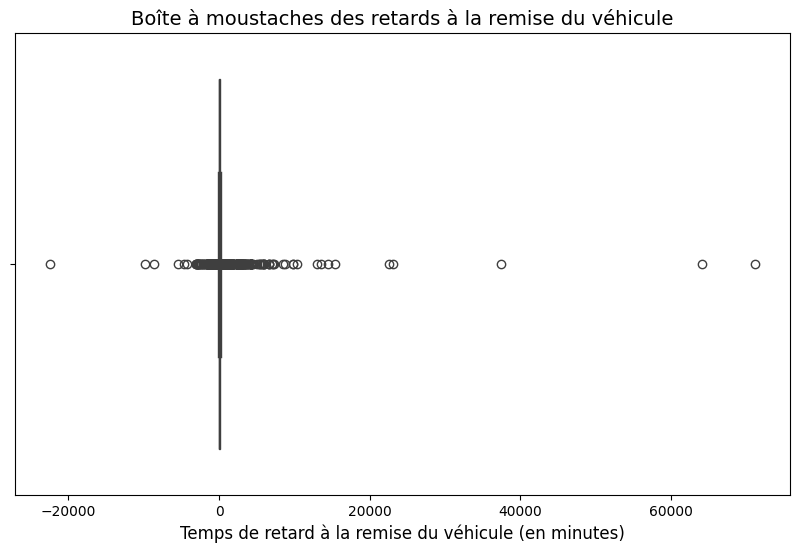

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer la boîte à moustaches (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=delay_analysis_cleaned, x='delay_at_checkout_in_minutes')

# Ajouter des titres et des labels
plt.title('Boîte à moustaches des retards à la remise du véhicule', fontsize=14)
plt.xlabel('Temps de retard à la remise du véhicule (en minutes)', fontsize=12)

# Afficher le graphique
plt.show()


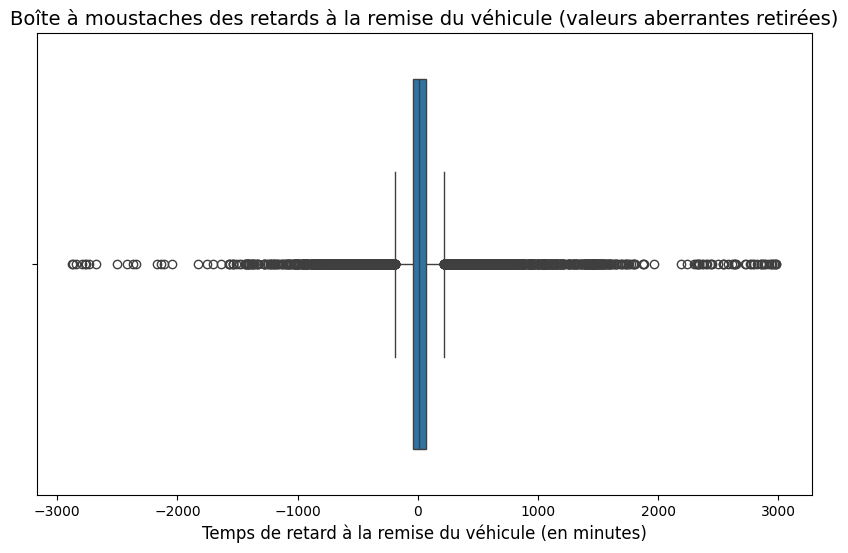

In [7]:
# Calculer la moyenne et l'écart-type de la colonne 'delay_at_checkout_in_minutes'
mean_delay = delay_analysis_cleaned['delay_at_checkout_in_minutes'].mean()
std_delay = delay_analysis_cleaned['delay_at_checkout_in_minutes'].std()

# Appliquer le filtre pour retirer les valeurs aberrantes (plus de 3 écart-types)
filtered_data = delay_analysis_cleaned[(delay_analysis_cleaned['delay_at_checkout_in_minutes'] >= mean_delay - 3 * std_delay) &
                                       (delay_analysis_cleaned['delay_at_checkout_in_minutes'] <= mean_delay + 3 * std_delay)]

# Afficher la boîte à moustaches sur les données filtrées
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_data, x='delay_at_checkout_in_minutes')

# Ajouter des titres et des labels
plt.title('Boîte à moustaches des retards à la remise du véhicule (valeurs aberrantes retirées)', fontsize=14)
plt.xlabel('Temps de retard à la remise du véhicule (en minutes)', fontsize=12)

# Afficher le graphique
plt.show()


In [8]:
# Calculer les valeurs de la boîte à moustaches
median_delay = filtered_data['delay_at_checkout_in_minutes'].median()
q25 = filtered_data['delay_at_checkout_in_minutes'].quantile(0.25)
q75 = filtered_data['delay_at_checkout_in_minutes'].quantile(0.75)

print(f"Médiane : {median_delay} minutes")
print(f"Premier quartile (Q1) : {q25} minutes")
print(f"Troisième quartile (Q3) : {q75} minutes")


Médiane : 9.0 minutes
Premier quartile (Q1) : -37.0 minutes
Troisième quartile (Q3) : 66.0 minutes


In [9]:
# Calculer l'écart interquartile (IQR)
iqr = q75 - q25
print(f"Écart interquartile (IQR) : {iqr} minutes")


Écart interquartile (IQR) : 103.0 minutes


si en moyenne comme on a vu tout à l'heure, les gens ont pres de 60min de retard et que le 3eme quartie est à 66, alors bloqué le treshold entre 2 locations à 1h evitera pratiqument les 3/4 des annulations

In [11]:
# Calculer la moyenne de la colonne 'time_delta_with_previous_rental_in_minutes'
average_time_delta = delay_analysis['time_delta_with_previous_rental_in_minutes'].mean()

# Afficher la moyenne de time_delta_with_previous_rental_in_minutes
print(f"Moyenne du temps entre deux locations successives (en minutes) : {average_time_delta}")


Moyenne du temps entre deux locations successives (en minutes) : 279.28843020097776


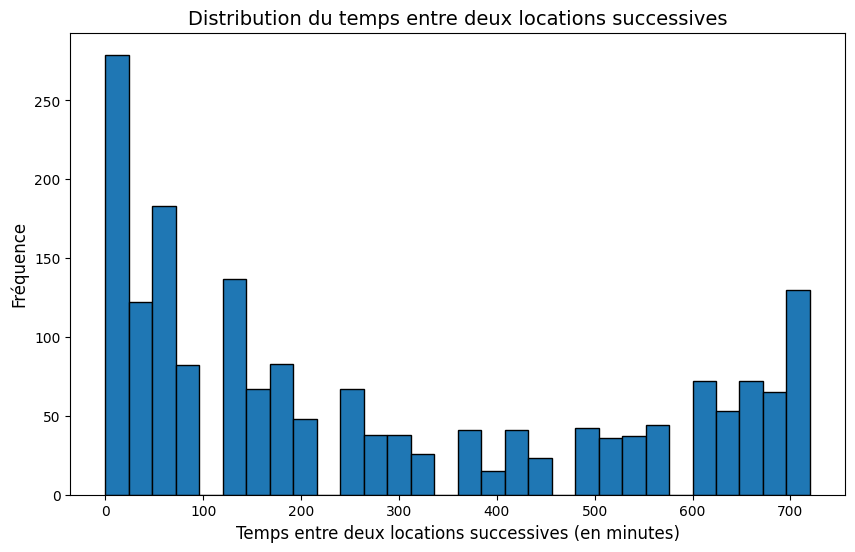

In [12]:
# Tracer un histogramme pour 'time_delta_with_previous_rental_in_minutes'
plt.figure(figsize=(10,6))
plt.hist(delay_analysis['time_delta_with_previous_rental_in_minutes'], bins=30, edgecolor='black')

# Ajouter des titres et des labels
plt.title('Distribution du temps entre deux locations successives', fontsize=14)
plt.xlabel('Temps entre deux locations successives (en minutes)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Afficher le graphique
plt.show()


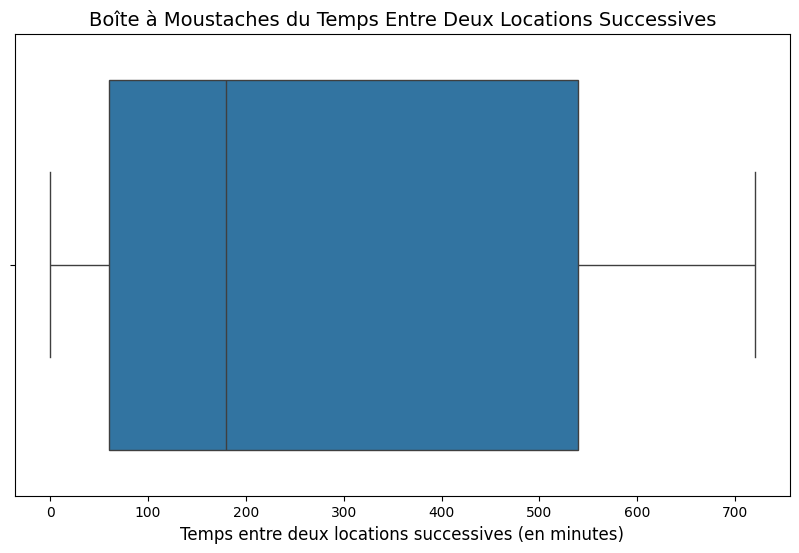

In [13]:
# Tracer la boîte à moustaches pour 'time_delta_with_previous_rental_in_minutes'
plt.figure(figsize=(10,6))
sns.boxplot(data=delay_analysis, x='time_delta_with_previous_rental_in_minutes')

# Ajouter des titres et des labels
plt.title('Boîte à Moustaches du Temps Entre Deux Locations Successives', fontsize=14)
plt.xlabel('Temps entre deux locations successives (en minutes)', fontsize=12)

# Afficher le graphique
plt.show()


C'est très désequilibré
La majorité des attentes sont inferieure à l'heure, mettre un treshold sur 1h pourrait léser beaucoup d'usagé du quotidien

In [14]:
# Calcul des statistiques descriptives pour 'time_delta_with_previous_rental_in_minutes'
median_time_delta = delay_analysis['time_delta_with_previous_rental_in_minutes'].median()
q1_time_delta = delay_analysis['time_delta_with_previous_rental_in_minutes'].quantile(0.25)
q3_time_delta = delay_analysis['time_delta_with_previous_rental_in_minutes'].quantile(0.75)

# Calcul du pourcentage de locations avec un temps d'attente inférieur à 60 minutes
less_than_1_hour = delay_analysis[delay_analysis['time_delta_with_previous_rental_in_minutes'] <= 60]
percentage_less_than_1_hour = (len(less_than_1_hour) / len(delay_analysis)) * 100

# Affichage des résultats
print(f"Médiane du temps entre deux locations successives : {median_time_delta} minutes")
print(f"Premier quartile (Q1) : {q1_time_delta} minutes")
print(f"Troisième quartile (Q3) : {q3_time_delta} minutes")
print(f"Pourcentage de locations avec un temps d'attente inférieur à 60 minutes : {percentage_less_than_1_hour:.2f}%")


Médiane du temps entre deux locations successives : 180.0 minutes
Premier quartile (Q1) : 60.0 minutes
Troisième quartile (Q3) : 540.0 minutes
Pourcentage de locations avec un temps d'attente inférieur à 60 minutes : 2.74%
